In [1]:
#Antes de iniciar instalar
#pip3 install pydotplus
#pip3 install sklearn
#pip3 install pandas
#pip3 install numpy
#pip3 install matplotlib
#pip3 install seaborn

In [2]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import sklearn
import random

In [3]:
df_users = pd.read_csv("../datasets/users.csv")
df_repos = pd.read_csv("../datasets/repos.csv")
df_ratings = pd.read_csv("../datasets/raitings.csv")
print(df_users.head())
print(df_repos.head())
print(df_ratings.head())

   Unnamed: 0  1  jsanch81@eafit.edu.co       Jose
0           0  2    zeatgomez@gmail.com      sebas
1           1  3  sgomezp1@eafit.edu.co  Sebastian
2           2  4     mstabare@gmail.com      Marta
3           3  5  dantivar@eafit.edu.co      Duvan
4           4  6     ivanpaez@gmail.com       IVAN
   Unnamed: 0  19                   Data preparation for Data Mining     pdf  \
0           0   1                                   Machine Learning  imagen   
1           1   2  Data Science vs Data Analytics vs Machine Lear...  imagen   
2           2   3                              Data Scientist skills  imagen   
3           3   4                                   Hadoop Ecosystem  imagen   
4           4   5                                    Data Processing  imagen   

     3  
0  4.0  
1  2.0  
2  9.0  
3  1.0  
4  6.0  
   Unnamed: 0  userId  contenidoId  raiting
0           0       2            1        6
1           1       2            2        6
2           2       2      

In [4]:
list(df_users)

['Unnamed: 0', '1', 'jsanch81@eafit.edu.co', 'Jose']

In [5]:
list(df_repos)

['Unnamed: 0', '19', 'Data preparation for Data Mining', 'pdf', '3']

In [6]:
list(df_ratings)

['Unnamed: 0', 'userId', 'contenidoId', 'raiting']

In [7]:
del df_users['Unnamed: 0']
del df_repos['Unnamed: 0']
del df_ratings['Unnamed: 0']

In [8]:
#se deja, userID = 1, username= correo, name= jose 
#list(df_users)
#se dejaen repos, contenidoId = 19, tittle= Data preparation for Data Mining, categoría= pdf, 3= stars
#list(df_repos)
#	userId	contenidoId	raiting
#list(df_ratings)

In [9]:
print(df_users.head())
print(df_repos.head())
print(df_ratings.head())

   1  jsanch81@eafit.edu.co       Jose
0  2    zeatgomez@gmail.com      sebas
1  3  sgomezp1@eafit.edu.co  Sebastian
2  4     mstabare@gmail.com      Marta
3  5  dantivar@eafit.edu.co      Duvan
4  6     ivanpaez@gmail.com       IVAN
   19                   Data preparation for Data Mining     pdf    3
0   1                                   Machine Learning  imagen  4.0
1   2  Data Science vs Data Analytics vs Machine Lear...  imagen  2.0
2   3                              Data Scientist skills  imagen  9.0
3   4                                   Hadoop Ecosystem  imagen  1.0
4   5                                    Data Processing  imagen  6.0
   userId  contenidoId  raiting
0       2            1        6
1       2            2        6
2       2            3        7
3       2            4        3
4       2            5        3


In [10]:
n_users = df_ratings.userId.unique().shape[0]
n_items = df_ratings.contenidoId.unique().shape[0]
print (str(n_users) + ' users')
print (str(n_items) + ' items')

6 users
19 items


(array([15., 16.,  8., 14.,  7., 13.,  7.,  8., 10., 16.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

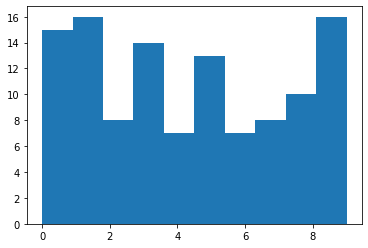

In [11]:
#un historico grafico del raiting de los 114 elementos
plt.hist(df_ratings.raiting,bins=10)

In [12]:
#Para ver las puntuaciones exactas
df_ratings.groupby(["raiting"])["userId"].count()

raiting
0    15
1    16
2     8
3    14
4     7
5    13
6     7
7     8
8    10
9    16
Name: userId, dtype: int64

In [13]:
#Matriz de usuarios y raiting
df_matrix = pd.pivot_table(df_ratings, values='raiting', index='userId', columns='contenidoId').fillna(0)
df_matrix

contenidoId,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,20
userId,,,,,,,,,,,,,,,,,,,
2,6,6,7,3,3,0,5,7,0,1,5,2,1,0,9,7,0,4,1
3,8,4,4,8,3,4,0,5,3,7,5,7,6,7,0,9,1,6,9
4,9,0,9,1,1,9,3,0,9,9,1,5,2,3,1,9,2,1,1
5,2,0,3,8,9,2,9,1,1,5,6,5,2,6,9,1,0,4,8
6,3,0,9,8,1,7,3,3,5,5,7,3,8,0,5,3,9,2,6
7,3,9,8,1,9,0,2,5,8,8,4,8,5,0,0,3,1,4,5


In [14]:
#Porcentaje de esparción
#Entre más bajito más ceros que llenar
ratings = df_matrix.values
sparsity = float(len(ratings.nonzero()[0]))
sparsity /= (ratings.shape[0] * ratings.shape[1])
sparsity *= 100
print('Sparsity: {:4.2f}%'.format(sparsity))

Sparsity: 86.84%


In [15]:
#División de datos para entrenamiento y pruebas
ratings_train, ratings_test = train_test_split(ratings, test_size = 0.2, random_state=33)
print(ratings_train.shape)
print(ratings_test.shape)

(4, 19)
(2, 19)


In [16]:
#Hallamos la matriz de similitud entre los usuarios, esta vez usando coseno
sim_matrix = 1 - sklearn.metrics.pairwise.cosine_distances(ratings)
print(sim_matrix.shape)

(6, 6)


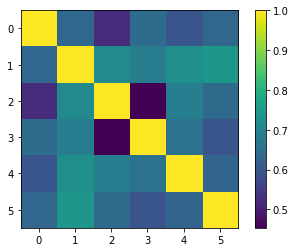

In [17]:
#Entre más cercano sea el valor a 1, mayor similitud tendran los usuarios
plt.imshow(sim_matrix);
plt.colorbar()
plt.show()

In [18]:
#se separan las filas y columnas de train y test
#usuarios
sim_matrix_train = sim_matrix[0:6,0:4]
#contenido
sim_matrix_test = sim_matrix[0:19,0:4]


users_predictions = sim_matrix_train.dot(ratings_train) / np.array([np.abs(sim_matrix_train).sum(axis=1)]).T

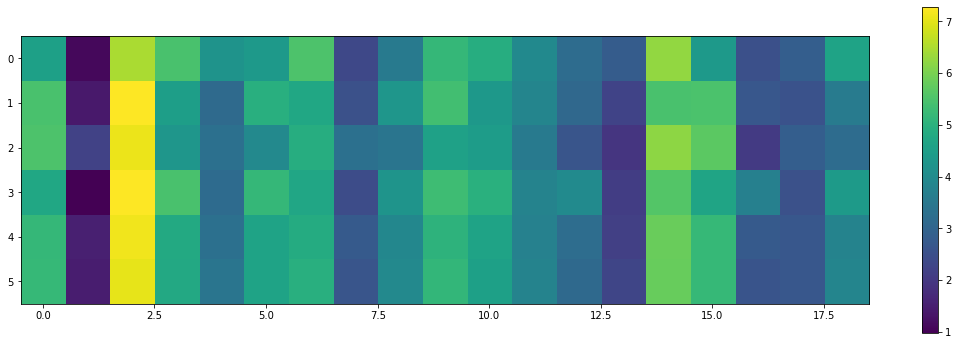

In [19]:
#Entre más alto puntee, significa que es una mejor recomendación
plt.rcParams['figure.figsize'] = (19,6)
plt.imshow(users_predictions);
plt.colorbar()
plt.show()

In [20]:
#Modificar puntajes
def refuerzo(users_predictions, username, calificación):
    #ponemos el username del usuario al cual queremos verle sus recomendaciones
    USUARIO_EJEMPLO = username
    data = df_users[df_users['jsanch81@eafit.edu.co'] == USUARIO_EJEMPLO]
    usuario_ver = data.iloc[0]['1'] - 1 # resta 1 para obtener el index de pandas.
    user0=users_predictions.argsort()[usuario_ver]

    # Visualizar los contenidos disponibles para el usuario y su respectiva calificación
    # Podemos poner user0[-5:] para visualizar el top 5 (+)
    #titulo= Data preparation for Data Mining, contenidoId = 19
    for i, aRepo in enumerate(user0[:]):
        selRepo = df_repos[df_repos['19']==(aRepo+1)]
        #seleccionar mismo ContenidoID
        new_rating_contenido_id = df_ratings[df_ratings['contenidoId']==(aRepo+1)]
        #Seleccionar mismo userID
        new_rating_user = df_ratings[df_ratings['userId'] == (usuario_ver+1)]
        #llamamos a la clase donde haremos las modificacione dependiendo del raiting
        transform(users_predictions, df_ratings, usuario_ver, aRepo, df_matrix, new_rating_contenido_id, new_rating_user, calificación)
        

In [21]:
#Cada que se modifique el contenido, se reentrena el sistema
def retrain(df_ratings):
    df_matrix = pd.pivot_table(df_ratings, values='raiting', index='userId', columns='contenidoId').fillna(0)
    ratings = df_matrix.values
    ratings_train, ratings_test = train_test_split(ratings, test_size = 0.2, random_state=33)

In [22]:
#Modificar puntajes beta
def transform(users_predictions, df_ratings, usuario_ver, aRepo, df_matrix, new_rating_contenido_id, new_rating_user, calificación):
    #Nuevos Enfoques para futuros cambios.
    #cont_ID = df_ratings.iloc[aRepo]['contenidoId']
    #user_ID = df_ratings.iloc[aRepo]['userId']
    #print(user_ID)
    #print(cont_ID)
    rait= df_ratings.iloc[aRepo]['raiting']
    #secuencia = df_ratings['raiting'].values
    #print(rait, 'valores -> ' , secuencia)
    
    #Condición si me baso en el valor predictivo
    #if users_predictions[usuario_ver][aRepo] == 0:
    #condición si me baso en la calificación propia del usuario del contenido
    #Para esta etapa el valor ingresado por le usuario es un aleatorio entre 0 y 10
    #rait
    if rait == 0:
        df_ratings.loc[aRepo , 'raiting'] = calificación
        retrain(df_ratings)
        users_predictions = sim_matrix_train.dot(ratings_train) / np.array([np.abs(sim_matrix_train).sum(axis=1)]).T
        print('Valoración previa 0 ->' , users_predictions[usuario_ver][aRepo])
    elif rait <=5:
        df_ratings.loc[aRepo , 'raiting'] = 0
        retrain(df_ratings)
        users_predictions = sim_matrix_train.dot(ratings_train) / np.array([np.abs(sim_matrix_train).sum(axis=1)]).T
        print('Valoración previa entre 0 y 5 ->' , users_predictions[usuario_ver][aRepo])
    else:
        df_ratings.loc[aRepo , 'raiting'] = (df_ratings.loc[aRepo, 'raiting'])
        retrain(df_ratings)
        users_predictions = sim_matrix_train.dot(ratings_train) / np.array([np.abs(sim_matrix_train).sum(axis=1)]).T -0.33
        print('Valoración previa mayor a 5 ->' , users_predictions[usuario_ver][aRepo])

    


In [23]:
#username= jsanch81@eafit.edu.co, userID= 1
#ponemos el username del usuario al cual queremos verle sus recomendaciones y calificamos
username = 'zeatgomez@gmail.com'
#Podremos calificar con un valor entre 0 y 10
calificación = random.randrange(10)
#Llamamos el metodo para re-entrenar el sistema
refuerzo(users_predictions, username, calificación)

Valoración previa mayor a 5 -> 1.0808914555671891
Valoración previa 0 -> 2.2516706964756352
Valoración previa mayor a 5 -> 2.2009149620741146
Valoración previa entre 0 y 5 -> 2.561731607868808
Valoración previa 0 -> 2.682253718420597
Valoración previa entre 0 y 5 -> 3.113605607811111
Valoración previa entre 0 y 5 -> 3.15427986153231
Valoración previa entre 0 y 5 -> 3.597446690749488
Valoración previa entre 0 y 5 -> 3.8449695443034133
Valoración previa 0 -> 4.300510651146651
Valoración previa entre 0 y 5 -> 4.341837680998298
Valoración previa entre 0 y 5 -> 4.51732857051821
Valoración previa entre 0 y 5 -> 4.733284184113166
Valoración previa 0 -> 4.960593217769216
Valoración previa entre 0 y 5 -> 5.377650581912807
Valoración previa mayor a 5 -> 5.1343407729254835
Valoración previa mayor a 5 -> 5.142315217510422
Valoración previa mayor a 5 -> 5.166965954728713
Valoración previa mayor a 5 -> 6.936715815886834


In [24]:
#Validando el error
def get_mse(preds, actuals):
    if preds.shape[1] != actuals.shape[1]:
        actuals = actuals.T
    preds = preds[actuals.nonzero()].flatten()
    actuals = actuals[actuals.nonzero()].flatten()
    return mean_squared_error(preds, actuals)

In [25]:
#Entrenamiento
get_mse(users_predictions, ratings_train)

6.140351978119497

In [26]:
# Realizo las predicciones para el test set
users_predictions_test = sim_matrix.dot(ratings) / np.array([np.abs(sim_matrix).sum(axis=1)]).T
users_predictions_test = users_predictions_test[0:19,:]
 
get_mse(users_predictions_test, ratings_test)

6.2510351703364595

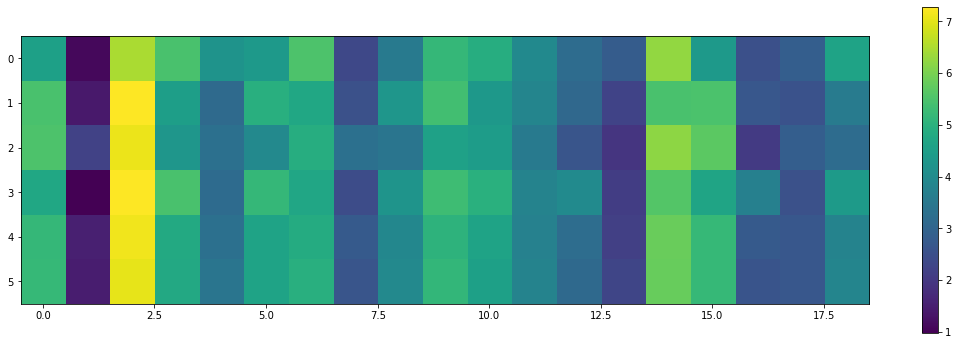

In [27]:
#Entre más alto puntee, significa que es una mejor recomendación
plt.rcParams['figure.figsize'] = (19, 6)
plt.imshow(users_predictions);
plt.colorbar()
plt.show()